# Examples on using MTSDataModel

## Load modules

In [1]:
import sys
sys.path.insert(0,r'../src/')
import MTSDataModel as mts

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import rpy2

## Get data

In [3]:
filename = 'sample_data.csv'
colnames = {'level1': 'Variable', 'level2': 'Country', 'value': 'Value','index': 'Date'}
do = mts.MTSDataModel(filepath = filename, colnames = colnames)

In [4]:
df = do.ReturnDf()
df.head()

GDP                Inflation                       StockPrices  \
           DEU           FIN        AUT        DEU        FIN         AUT   
1970-01-01 NaN  6.355725e+10  25.154467  31.620100  12.784633   11.314692   
1970-04-01 NaN  6.568328e+10  25.412633  31.900933  12.861467   11.390358   
1970-07-01 NaN  6.706184e+10  25.781500  31.947800  12.946200   12.117531   
1970-10-01 NaN  6.790094e+10  26.002767  32.252033  13.017667   12.248969   
1971-01-01 NaN  6.437505e+10  26.260967  33.024367  13.290433   12.077389   

                                 
                  DEU       FIN  
1970-01-01  10.873145  1.247428  
1970-04-01   9.807037  1.306829  
1970-07-01   9.271091  1.348410  
1970-10-01   8.835394  1.401871  
1971-01-01   9.699077  1.490974

## Pre-processing

### Deflate

In [5]:
do.DeflateVariables(['StockPrices'], infvar = 'Inflation')

C:\Users\ville_000\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
../src\MTSDataModel.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['X_hat'] = self.Deflate(frame)
C:\Users\ville_000\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).renam

### De-trend

In [6]:
do.DetrendVariables(['StockPrices_def','GDP'], difftype = 'ld')

## Feature engineering

### Wavelet MRA decompositions

In [7]:
do.MRADecomposition(variables = ['GDP_ld1'], entities=['FIN'],levels = 6,expanding='none')
#do.MRADecomposition(variables = ['GDP_ld1'],levels = 6,expanding='none') # bug here

C:\Users\ville_000\Anaconda3\lib\site-packages\rpy2-2.9.4-py3.5-win-amd64.egg\rpy2\robjects\pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


### Dimension reduction

In [8]:
do.ReduceVariableDimension(suffix = 'PC', variables = ['StockPrices_def_ld1','GDP_ld1'] , entities = ['FIN','DEU'])

### Plot

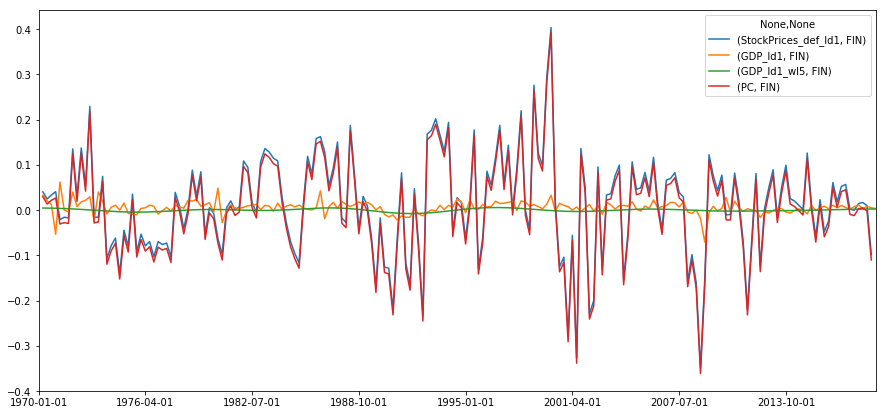

In [9]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1,1,1)
do.PlotVariables(variables=['StockPrices_def_ld1','GDP_ld1','PC','GDP_ld1_wl5'], entities=['FIN'], ax=ax)